## De Opdracht - Mesa
Er is een enorme hoeveelheid tools ontworpen waarmee je god kan spelen over je eigen werkelijkheid. Zie dit paper voor meer informatie over deze tools. Deze week maken jullie kennis met een van deze tools. De opdracht is individueel, maar voor het team is het uitermate belangrijk dat je deze opdracht serieus aanpakt! Volgende week gaan jullie namelijk werken aan een plan van aanpak voor een onderzoek naar verkeerssituaties of verkiezingstrategien met behulp van een Agent-based simulatie. Daarbij moeten jullie aan elkaar kunnen uitleggen wat de voor- en nadelen zijn van de tool die je deze week gaat ontdekken.

De opdracht bestaat uit het volgen van een tutorial voor één van drie tools om een Agent-based simulatie te maken. Bij de groepsopdracht wordt verwacht dat alle drie de tools meegenomen worden bij een beslissing over welke tool gebruikt gaat worden voor de opdracht. Dus het helpt als je als team gezamelijk kennis heeft over alle tools.

### Mesa Overview (Tutorial)
Deze tutorial is te vinden met de link:

https://mesa.readthedocs.io/en/master/overview.html

We beginnen eerst met de imports nodig om dit te laten werken.

In [19]:
# Imports
from mesa import Agent, Model
from mesa.time import RandomActivation
from mesa.space import MultiGrid, Grid

from mesa.datacollection import DataCollector
from mesa.batchrunner import BatchRunner

from mesa.visualization.modules import CanvasGrid, ChartModule, PieChartModule
from mesa.visualization.ModularVisualization import ModularServer
from mesa.visualization.UserParam import UserSettableParameter

Dan gaan we het skelet van een Mesa model opzetten.
We beginnen met een basic agent.

In [2]:
class MyAgent(Agent):
    def __init__(self, name, model):
        super().__init__(name, model)
        self.name = name
        # Dit maakt het agent object aan.

    def step(self):
        print("{} activated".format(self.name))
        # Step is de functie die aangeeft wat de agent doet als deze wordt aangeroepen.

De agent doet momenteel nog niks buiten het aangeven dat hij wordt aangeroepen.

Dan maken we een basic model waarin de agents kunnen bestaan. Dit is echter nog geen grid waar de agents op kunnen staan. Het is een soort main functie waar alles zich in bevindt.

In [3]:
class MyModel(Model):
    def __init__(self, n_agents):
        super().__init__()
        self.schedule = RandomActivation(self) # Hier is de schedule RandomActivation aangemaakt die en step() wordt benoemd.
        self.grid = MultiGrid(10, 10, torus=True) # Een grid waar agents op geplaatst kunnen worden.
        for i in range(n_agents):
            a = MyAgent(i, self)
            self.schedule.add(a)
            coords = (self.random.randrange(0, 10), self.random.randrange(0, 10))
            self.grid.place_agent(a, coords)

    def step(self):
        self.schedule.step()
         # RandomActivation activeerd elke stap een random agent. En is te vinden in de time module

Het bovenstaande model maakt dus voor het aantal aangegeven agents agents aan in een loop en plaats deze ergens random op de grid. Als de step functie wordt aangeroepen komt het model pas 'tot leven'. Tot die tijd doen de agents dus nog niets.

Hieronder wordt het model aangemaakt en 1 step geactiveerd.

In [4]:
model = MyModel(5)
model.step()

1 activated
3 activated
0 activated
4 activated
2 activated


Ook kan je een data collector toevoegen.

In [5]:
class MyDataCollectorModel(Model):
    def __init__(self, n_agents):
        # ...
        self.dc = DataCollector(model_reporters={"agent_count":
                                    lambda m: m.schedule.get_agent_count()},
                                agent_reporters={"name": lambda a: a.name})

    def step(self):
        self.schedule.step()
        self.dc.collect(self) # Hier zie je dat de data dus elke step wordt opgeslagen.

Dit voegen we toen aan ons bestaande model:

In [6]:
class MyModel(Model):
    def __init__(self, n_agents):
        super().__init__()
        self.schedule = RandomActivation(self)
        self.grid = MultiGrid(10, 10, torus=True)
        self.dc = DataCollector(model_reporters={"agent_count": # <<<
                                    lambda m: m.schedule.get_agent_count()},
                                agent_reporters={"name": lambda a: a.name})
        for i in range(n_agents):
            a = MyAgent(i, self)
            self.schedule.add(a)
            coords = (self.random.randrange(0, 10), self.random.randrange(0, 10))
            self.grid.place_agent(a, coords)

    def step(self):
        self.schedule.step()
        self.dc.collect(self) # <<<

In [7]:
model = MyModel(5)
for t in range(2):
    model.step()
model_df = model.dc.get_model_vars_dataframe()
agent_df = model.dc.get_agent_vars_dataframe()

0 activated
2 activated
1 activated
4 activated
3 activated
0 activated
1 activated
4 activated
2 activated
3 activated


Hier onder kan je zien wat het resultaat is van de data collectors.

In [8]:
model_df

,agent_count
0,5
1,5


In [9]:
agent_df

name
Step AgentID      
1    0           0
     1           1
     2           2
     3           3
     4           4
2    0           0
     1           1
     2           2
     3           3
     4           4

dan heb je ook nog een batch runner wat er voor zorgt dat je een model meerdere keren achter elkaar kan laten runnen met andere parameters. 

(In dit geval dus steeds meer agents.)

In [10]:
parameters = {"n_agents": range(1, 20)}
batch_run = BatchRunner(MyModel, parameters, max_steps=10,
                        model_reporters={"n_agents": lambda m: m.schedule.get_agent_count()})

In [11]:
# Run alle batches.
batch_run.run_all()

0it [00:00, ?it/s]

0 activated
0 activated
0 activated
0 activated
0 activated
0 activated
0 activated
0 activated
0 activated
0 activated
0 activated
1 activated
0 activated
1 activated
0 activated
1 activated
1 activated
0 activated
0 activated
1 activated
0 activated
1 activated
1 activated
0 activated
1 activated
0 activated
0 activated
1 activated
0 activated
1 activated
0 activated
2 activated
1 activated
1 activated
0 activated
2 activated
2 activated
0 activated
1 activated
0 activated
2 activated
1 activated
1 activated
0 activated
2 activated
0 activated
2 activated
1 activated
1 activated
2 activated
0 activated
1 activated
2 activated
0 activated
2 activated
1 activated
0 activated
1 activated
0 activated
2 activated
1 activated
0 activated
3 activated
2 activated
3 activated
0 activated
2 activated
1 activated
1 activated
2 activated
0 activated
3 activated
1 activated
3 activated
2 activated
0 activated
1 activated
3 activated
0 activated
2 activated
2 activated
0 activated
1 activated
3 ac

19it [00:00, 224.13it/s]


8 activated
1 activated
16 activated
13 activated
10 activated
14 activated
15 activated
3 activated
7 activated
5 activated
0 activated
4 activated
11 activated
12 activated
9 activated
2 activated
6 activated
0 activated
3 activated
15 activated
7 activated
4 activated
10 activated
14 activated
5 activated
2 activated
13 activated
11 activated
12 activated
1 activated
8 activated
6 activated
16 activated
9 activated
1 activated
2 activated
16 activated
8 activated
7 activated
3 activated
9 activated
12 activated
10 activated
6 activated
5 activated
0 activated
11 activated
4 activated
13 activated
14 activated
15 activated
6 activated
15 activated
9 activated
16 activated
5 activated
12 activated
0 activated
2 activated
13 activated
10 activated
14 activated
3 activated
7 activated
1 activated
11 activated
8 activated
4 activated
3 activated
5 activated
16 activated
14 activated
0 activated
9 activated
1 activated
11 activated
13 activated
7 activated
8 activated
4 activated
10 acti

Ook van een batchrun is een data collector te maken. (Hier zie je dat het aantal agents per run daadwerkelijk meer wordt.)

In [12]:
batch_df = batch_run.get_model_vars_dataframe()
batch_df

,n_agents,Run
0,1,0
1,2,1
2,3,2
3,4,3
4,5,4
5,6,5
6,7,6
7,8,7
8,9,8
9,10,9


En dan tot slot het visualiseren van het model.
Om een weergave van de agent te maken kan je iets simpels als hier onder maken.

In [13]:
def agent_portrayal(agent):
    portrayal = {"Shape": "circle",
                 "Filled": "true",
                 "Layer": 0,
                 "Color": "red",
                 "r": 0.5}
    return portrayal

Waarna je een grid kan maken waarin dus de agents met bovenstaande functie worden gevisualiseerd.

De grid is nu nog niet zelf zichtbaar als je hem aanroept.

In [14]:
grid = CanvasGrid(agent_portrayal, 10, 10, 500, 500)
grid

Als je wilt dat het zichtbaar wordt moet je eerst een server aanmaken en deze vervolgens lauchen.

In [15]:
server = ModularServer(MyModel,
                       [grid],
                       "My Model",
                       {'n_agents': 10})
# server.launch()

Helaas is er geen stop funcite voor de server en kan je deze niet meerdere keren achter elkaar aanroepen.
Als je dat wel wilt doen is het nodig om de kernel te herstarten.

Tot hier gaat de Mesa overview tutorial.

Aangezien dit niet voldoende informatie geeft om de vragen goed te beantwoorden gaan we ook naar het voorbeeld: 'Forest fire' Kijken.

Eerst maken we weer de agent aan (in dit geval een tree cell).

In [16]:
class TreeCell(Agent):
    """
    A tree cell.
    Attributes:
        x, y: Grid coordinates
        condition: Can be "Fine", "On Fire", or "Burned Out"
        unique_id: (x,y) tuple.
    unique_id isn't strictly necessary here, but it's good
    practice to give one to each agent anyway.
    """

    def __init__(self, pos, model):
        """
        Create a new tree.
        Args:
            pos: The tree's coordinates on the grid.
            model: standard model reference for agent.
        """
        super().__init__(pos, model)
        self.pos = pos
        self.condition = "Fine"

    def step(self):
        """
        If the tree is on fire, spread it to fine trees nearby.
        """
        if self.condition == "On Fire":
            for neighbor in self.model.grid.neighbor_iter(self.pos):
                if neighbor.condition == "Fine":
                    neighbor.condition = "On Fire"
            self.condition = "Burned Out"

De TreeCell class werkt zo: Je hebt eerst een boom die ergens op de grid staat. Als deze boom 'Fine' of 'Burned Out' is gebeurd er niets. Maar als de boom 'On Fire' is zet deze de buren ook On Fire en wordt hij zelf Burned out. De tijdsduur van branden is dus ook 1 step.

Hierna kijken we naar het model.

In [17]:
class ForestFire(Model):
    """
    Simple Forest Fire model.
    """

    def __init__(self, height=100, width=100, density=0.65):
        """
        Create a new forest fire model.
        Args:
            height, width: The size of the grid to model
            density: What fraction of grid cells have a tree in them.
        """
        # Set up model objects
        self.schedule = RandomActivation(self)
        self.grid = Grid(height, width, torus=False)

        self.datacollector = DataCollector(
            {
                "Fine": lambda m: self.count_type(m, "Fine"),
                "On Fire": lambda m: self.count_type(m, "On Fire"),
                "Burned Out": lambda m: self.count_type(m, "Burned Out"),
            }
        )

        # Place a tree in each cell with Prob = density
        for (contents, x, y) in self.grid.coord_iter():
            if self.random.random() < density:
                # Create a tree
                new_tree = TreeCell((x, y), self)
                # Set all trees in the first column on fire.
                if x == 0:
                    new_tree.condition = "On Fire"
                self.grid._place_agent((x, y), new_tree)
                self.schedule.add(new_tree)

        self.running = True
        self.datacollector.collect(self)

    def step(self):
        """
        Advance the model by one step.
        """
        self.schedule.step()
        # collect data
        self.datacollector.collect(self)

        # Halt if no more fire
        if self.count_type(self, "On Fire") == 0:
            self.running = False

    @staticmethod
    def count_type(model, tree_condition):
        """
        Helper method to count trees in a given condition in a given model.
        """
        count = 0
        for tree in model.schedule.agents:
            if tree.condition == tree_condition:
                count += 1
        return count

Het model maakt een grid aan met een bepaalde density. Hierna worden alle bomen van de bovenste kolom 'On Fire' gezet.
Waar bij stap het heel de tijd 1 stap verder gaat en de info opslaat. Als er geen bomen meer 'On Fire' zijn doordat het niet volledig kon spreiden of alles is weg gebrand stopt het proces.

Dit model is dus erg handig om te zien bij welke densities het belangrijker is om geen bosbrand te hebben (aangezien misschien wel het hele bos weg is of juist nauwelijks iets).

Dan hebben we nog de visualisatie nodig.

In [20]:
COLORS = {"Fine": "#00AA00", "On Fire": "#880000", "Burned Out": "#000000"}


def forest_fire_portrayal(tree):
    if tree is None:
        return
    portrayal = {"Shape": "rect", "w": 1, "h": 1, "Filled": "true", "Layer": 0}
    (x, y) = tree.pos
    portrayal["x"] = x
    portrayal["y"] = y
    portrayal["Color"] = COLORS[tree.condition]
    return portrayal


canvas_element = CanvasGrid(forest_fire_portrayal, 100, 100, 500, 500)
tree_chart = ChartModule(
    [{"Label": label, "Color": color} for (label, color) in COLORS.items()]
)
pie_chart = PieChartModule(
    [{"Label": label, "Color": color} for (label, color) in COLORS.items()]
)

model_params = {
    "height": 100,
    "width": 100,
    "density": UserSettableParameter("slider", "Tree density", 0.65, 0.01, 1.0, 0.01),
}
server = ModularServer(
    ForestFire, [canvas_element, tree_chart, pie_chart], "Forest Fire", model_params
)

In [22]:
# een density van 45 geeft een erg mooi resultaat.
# server.launch()

{"type":"reset"}
{"type":"get_step","step":1}
{"type":"get_step","step":2}
{"type":"get_step","step":3}
{"type":"get_step","step":4}
{"type":"get_step","step":5}
{"type":"get_step","step":6}
{"type":"get_step","step":7}
{"type":"get_step","step":8}
{"type":"get_step","step":9}
{"type":"get_step","step":10}
{"type":"get_step","step":11}
{"type":"get_step","step":12}
{"type":"get_step","step":13}
{"type":"get_step","step":14}
{"type":"get_step","step":15}
{"type":"get_step","step":16}
{"type":"get_step","step":17}
{"type":"get_step","step":18}
{"type":"get_step","step":19}
{"type":"get_step","step":20}
{"type":"get_step","step":21}
{"type":"get_step","step":22}
{"type":"get_step","step":23}
{"type":"get_step","step":24}
{"type":"get_step","step":25}
{"type":"get_step","step":26}
{"type":"get_step","step":27}
{"type":"get_step","step":28}
{"type":"get_step","step":29}
{"type":"get_step","step":30}
{"type":"get_step","step":31}
{"type":"get_step","step":32}
{"type":"get_step","step":33}
{"

## Vragen
#### 1. Volg de tutorial en omschrijf daarna in één paragraaf wat deze tool anders maakt dan andere programmeertalen, wat zijn de voor- en nadelen?

In de tutorial van Mesa viel het meteen op dat de gebruiksvriendelijkheid erg hoog is. Mesa is een python module en dus erg makkelijk te leren voor mensen met kennis van Python. Ook is Mesa een erg goede keuze voor het verzamelen van simulatie data aangezien je in 1-2 lines code een compleet gevulde pandas dataframe hebt. In mijn ogen ligt hier ook de kracht van Mesa aangezien dit ook te combineren is met de batchrunner. Een nadeel aan mesa is dat de weergave persee via een server moet die niet heel aanpasbaar is. Je kan de agents en grid wel aanpassen en het model stap voor stap (of juist heel snel) laten runnen. Dit is echter ook alleen in 2D. Als visualisatie het doel is kan je hiervoor veel beter een andere tools kiezen. 

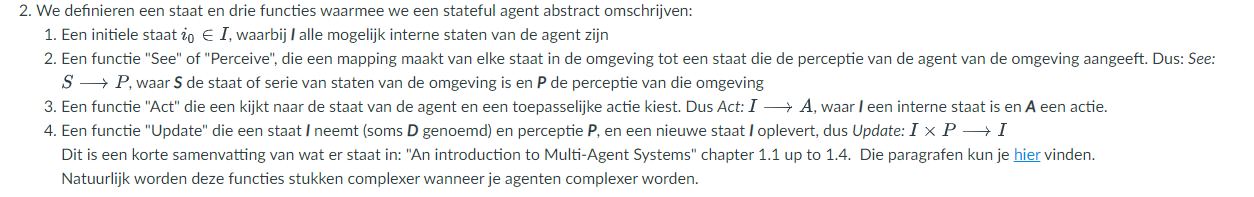
#### 2. Beschrijf in eigen worden wat elk van de 4 concepten in het algemeen beschrijft EN wat het in jouw specifieke simulatie betekent.

1. Dit staat voor de staat i0 (wat vaak de initieele staat is) "is onderdeel van" I (alle mogelijke interne staten). In het geval bij het forest fire simulatie betekent i0 De 'Fine' state is onderdeel van alle states van de TreeCell
2. Dit concept zegt wat hij kan zien dus hoe ver en wat het waarneemd. Bij forest fire 'ziet' de agent alleen zijn buren op het moment dat hij zelf 'On Fire' is.
3. Het concept Act geeft aan dat als je in een staat zit. Doe dan een bepaalde actie. Als de staat 'On Fire' is voert het de Actie uit om zijn buren ook 'On Fire' te zetten en dan zijn eigen state veranderd naar 'Burned Out'.
4. Bij de update functie neem je de huidige staat en kijk je wat er om je heen gebeurt. Wat je om je heen ziet bepaald wat de volgende staat wordt. Dit is eigenlijk het precies tegenovergestelde van wat er in de 'forest fire' simulatie gebeurd. Aangezien bij 'forest fire' je uit een state de andere agents beinvloed in plaats van kijken naar de andere agents om je zelf aan te passen. Echter is het effect het zelfde.

#### 3. Beschrijf je omgeving op basis van de dichotomiën die hier op pagina 6 beschreven staan, en licht toe (dus niet alleen termen opsommen):

- Accessible vs inaccessible

Volgens mij is de omgeving erg Accessible aangezien het alle informatie gelijk ter beschikking heeft op het moment dat het nodig is. In de 'Fine' state ziet het niks maar in mijn ogen is het nogsteeds accessible aangezien het ook nog niets hoeft te doen met zijn zicht. En wanneer het vuur wel moet worden verspreid kan het altijd zijn of het buren heeft.
- Deterministic vs non-Deterministic (Stochastic)

Het model is ook compleet Deterministisch. Er zijn geen dingen gebasseerd op kans (behalve het uiteindelijke resultaat door de density en waar de bomen dan worden geplaatst).
- Episodic vs non-episodic (Sequential)

Ook is dit model Episodic aangezien het alleen kijkt naar de huidige state. Tuurlijk is dit wel afhankelijk van de vorige state maar hier wordt niet naar gekeken. En is het ook niet non-episodic.
- Static vs Dynamic

Verder is het model ook static. Er is maar 1 type agent die als enige invloed uitoefend op het model en zelfde agent types.
- Discrete vs Continuous

Aangezien het model ALTIJD tot een stop komt (al is dit met een nog vol bos of alles is afgebrand) betekent dit dat het model discrete is. Er is een duidelijk eindpunt en aantal moves/mogelijkheden.

#### 4. Bedenk een voorbeeld waarbij minimaal 3 dichotomies precies tegenovergesteld zijn en beschrijf of het veranderen van je omgeving op deze manier wel of niet iets zou toevoegen aan je simulatie.

Om een beetje in het thema van natuur te blijven is het voorbeeld een simulatie over de groei/verspreiding van bloemen.
De 3 dichotomies die hier het tegenover gestelde zijn: deterministic vs non-deterministic, static vs dynamic, discrete vs continuous.
- Deterministic vs non-Deterministic (Stochastic)

Aangezien de bevruchting van een bloem afhankelijk is van de KANS op een succesvolle bestuiving is dit model non-deterministic

- Static vs Dynamic

Dit komt doordat voor de simulatie van bloemen er meerdere type agents zijn namelijk ook die van bijen. (Anders kan er geen bestuiving plaats vinden.

- Discrete vs Continuous

Het model hoeft niet tot een stop te komen aangezien het niet persee tot een stop hoeft te komen.

Ik denk dat het aanpassen van het model op deze mannier zeker iets zou 